In [1]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import sys
sys.path.append('..')
from sklearn.neural_network import MLPClassifier
from NN_helpers import draw_nn
import matplotlib.pyplot as plt
from NN_helpers import draw_response3D

from numpy import genfromtxt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

bupa_data = genfromtxt('bupa.csv', delimiter=',')
pima_data = genfromtxt('pima-indians-diabetes.csv', delimiter=',')

# Zad 7

In [2]:
y = pima_data[:,-1]
X = pima_data[:,:-2]

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1342) 

scaler = StandardScaler()  
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)


In [3]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(8,4), activation='logistic', random_state=1342, 
                    max_iter=100000, n_iter_no_change=1000)

clf.fit(X_train, y_train)


MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100000,
              momentum=0.9, n_iter_no_change=1000, nesterovs_momentum=True,
              power_t=0.5, random_state=1342, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [4]:
results = clf.predict(X_test)

confusion_matrix(results, y_test)

array([[43, 10],
       [ 7, 17]], dtype=int64)

[]

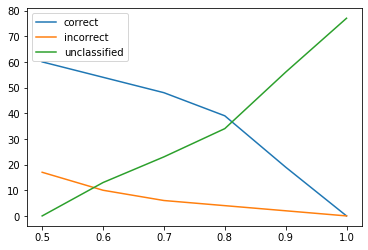

In [5]:
results = clf.predict_proba(X_test)

thresholds = np.array([[0.50001,0.49999],[0.6, 0.4],[0.7, 0.3],[0.8, 0.2],[0.9, 0.1],[1.0, 0.0]])

correct = []
incorrect = []
unclass = []

for K1,K2 in thresholds:
    count_correct = 0
    count_incorrect = 0
    count_unclass = 0
    for i in range(len(results)):

        if results[i][1]>=K1:
            if y_test[i]==1:
                count_correct+=1
            else:
                count_incorrect+=1
        elif results[i][1]<=K2:
            if y_test[i]==0:
                count_correct+=1
            else:
                count_incorrect+=1
        else:
            count_unclass+=1
    correct.append(count_correct)
    incorrect.append(count_incorrect)
    unclass.append(count_unclass)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(thresholds[:,0], correct,label = "correct")
ax.plot(thresholds[:,0], incorrect,label = "incorrect")
ax.plot(thresholds[:,0], unclass,label = "unclassified")
ax.legend()
plt.plot()

# Zad 8

1.0
layer weight matrix shapes: [(4, 4), (4, 3), (3, 3)]
detected layer sizes: [4, 4, 3, 3]


c:\users\luk3r\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
c:\users\luk3r\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
c:\users\luk3r\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
c:\users\luk3r\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: The truth value of an empty

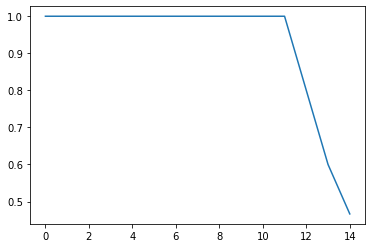

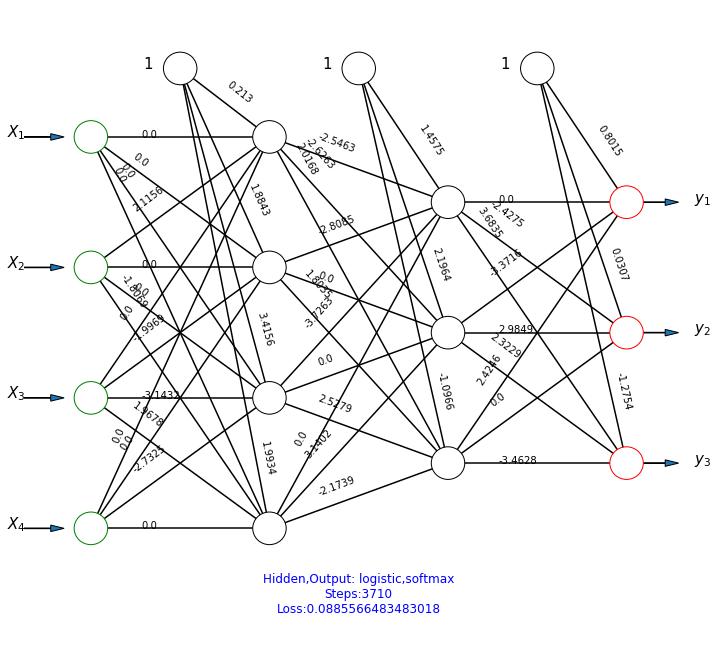

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1342) 

scaler = StandardScaler()  
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(4,3), activation='logistic', random_state=231, 
                    max_iter=100000, n_iter_no_change=1000) 

clf.fit(X_train, y_train)

print(clf.score(X_test,y_test))

def get_flat_w(clf):
    all_w = []
    clf.coefs_[0].flatten()
    return np.concatenate((clf.coefs_[0].flatten(),clf.coefs_[1].flatten(),clf.coefs_[2].flatten()))

all_w = get_flat_w(clf)
all_w_sorted = np.sort(np.abs(all_w))
temp = all_w_sorted[0]

acc = []
licz = []
for j in range(15):
    temp = all_w_sorted[j]
    for i in range(3):
        clf.coefs_[i][(np.where(np.abs(clf.coefs_[i]) == temp))]=0
        if np.where(np.abs(clf.coefs_[i]) == temp)[0]:
            break;
    licz.append(j)
    acc.append(clf.score(X_test,y_test))
 

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(licz, acc)
plt.plot()

draw_nn(clf) 

# Zad 9

### Iris

[]

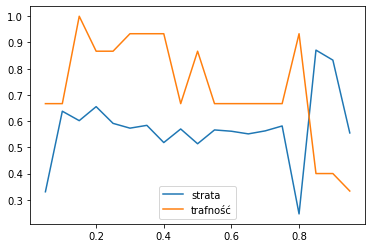

In [38]:
iris = load_iris()
X = iris.data
y = iris.target

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1342) 

scaler = StandardScaler()  
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

loss = []
licz = []
acc = []
for i in np.linspace(0.05,0.95,19):
    clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(4,3), activation='logistic',validation_fraction=i, early_stopping= True,random_state=231, 
                    max_iter=5000, n_iter_no_change=500) 
    clf.fit(X_train, y_train)
    licz.append(i)
    loss.append(clf.loss_)
    acc.append(clf.score(X_test,y_test))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(licz, loss,label = "strata")
ax.plot(licz, acc,label = "trafność")
ax.legend()
plt.plot()

### Pima

[]

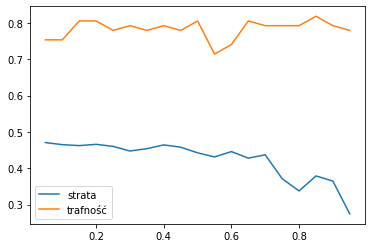

In [40]:
y = pima_data[:,-1]
X = pima_data[:,:-2]

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1342) 

scaler = StandardScaler()  
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

loss = []
licz = []
acc = []
for i in np.linspace(0.05,0.95,19):
    clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(8,4), activation='logistic',validation_fraction=i, early_stopping= True,random_state=1342, 
                    max_iter=5000, n_iter_no_change=500) 
    clf.fit(X_train, y_train)
    licz.append(i)
    loss.append(clf.loss_)
    acc.append(clf.score(X_test,y_test))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(licz, loss,label = "strata")
ax.plot(licz, acc,label = "trafność")
ax.legend()
plt.plot()